In [269]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [270]:
#import the iris dataframe
from sklearn.datasets import load_iris

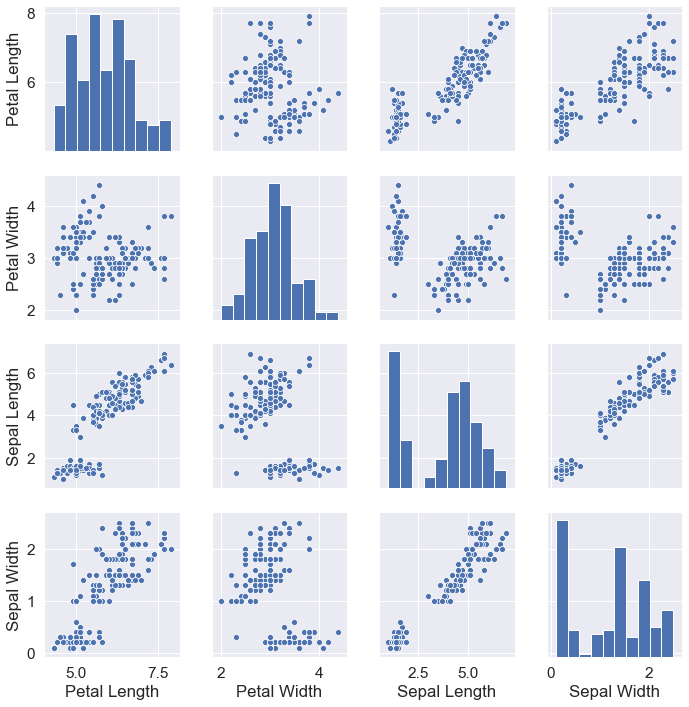

In [271]:
dataset=load_iris()
df = pd.DataFrame(dataset['data'],columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"])
sns.pairplot(df)


In [272]:
df['Ground Truth Cluster']=dataset['target']

In [273]:
#plt.scatter(df['Petal Length'],df['Petal Width'])
#plt.xlabel('Petal Length')
#plt.ylabel('Petal Width')

In [274]:
#plt.scatter(df['Sepal Length'],df['Sepal Width'])
#plt.xlabel('Sepal Length')
#plt.ylabel('Sepal Width')

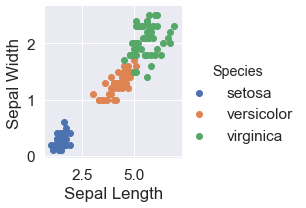

In [275]:
sns.FacetGrid(data,hue="Species")\
.map(plt.scatter,"Sepal Length","Sepal Width")\
.add_legend()
plt.show()

In [276]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Sepal Length','Sepal Width']])
    sse.append(km.inertia_)

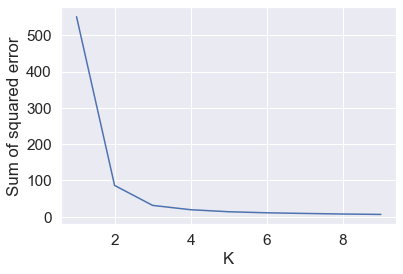

In [277]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [278]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Sepal Length','Sepal Width']])
df['Predicted_cluster']=y_predicted
df['Predicted_Species']=df['Predicted_cluster'].apply(lambda x: dataset['target_names'][x])
df['Ground Truth Species']=df['Ground Truth Cluster'].apply(lambda x: dataset['target_names'][x])
df.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Ground Truth Cluster,Predicted_cluster,Predicted_Species,Ground Truth Species
0,5.1,3.5,1.4,0.2,0,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,0,setosa,setosa
2,4.7,3.2,1.3,0.2,0,0,setosa,setosa
3,4.6,3.1,1.5,0.2,0,0,setosa,setosa
4,5.0,3.6,1.4,0.2,0,0,setosa,setosa


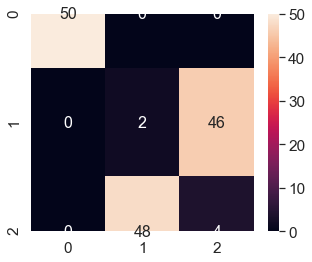

In [279]:
cm = confusion_matrix(df['Predicted_cluster'], df['Ground Truth Cluster'])
plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm, annot=True,annot_kws={"size": 16})# font size
